In [71]:
import os
os.chdir("C:\\Users\\telug\\OneDrive\\Desktop\\WD_Python")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [72]:
import sklearn
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [73]:
df= pd.read_csv("BreastCancer.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       699 non-null    int64  
 1   Id               699 non-null    int64  
 2   Cl.thickness     699 non-null    int64  
 3   Cell.size        699 non-null    int64  
 4   Cell.shape       699 non-null    int64  
 5   Marg.adhesion    699 non-null    int64  
 6   Epith.c.size     699 non-null    int64  
 7   Bare.nuclei      683 non-null    float64
 8   Bl.cromatin      699 non-null    int64  
 9   Normal.nucleoli  699 non-null    int64  
 10  Mitoses          699 non-null    int64  
 11  Class            699 non-null    object 
dtypes: float64(1), int64(10), object(1)
memory usage: 65.7+ KB


In [74]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [75]:
df

,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,benign
1,1002945,5,4,4,5,7,10.0,3,2,1,benign
2,1015425,3,1,1,1,2,2.0,3,1,1,benign
3,1016277,6,8,8,1,3,4.0,3,7,1,benign
4,1017023,4,1,1,3,2,1.0,3,1,1,benign
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2.0,1,1,1,benign
695,841769,2,1,1,1,2,1.0,1,1,1,benign
696,888820,5,10,10,3,7,3.0,8,10,2,malignant
697,897471,4,8,6,4,3,4.0,10,6,1,malignant


In [76]:
df.isnull().sum()

Id                  0
Cl.thickness        0
Cell.size           0
Cell.shape          0
Marg.adhesion       0
Epith.c.size        0
Bare.nuclei        16
Bl.cromatin         0
Normal.nucleoli     0
Mitoses             0
Class               0
dtype: int64

In [77]:
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

In [78]:
df.isnull().sum()

Id                 0
Cl.thickness       0
Cell.size          0
Cell.shape         0
Marg.adhesion      0
Epith.c.size       0
Bare.nuclei        0
Bl.cromatin        0
Normal.nucleoli    0
Mitoses            0
Class              0
dtype: int64

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               683 non-null    int64  
 1   Cl.thickness     683 non-null    int64  
 2   Cell.size        683 non-null    int64  
 3   Cell.shape       683 non-null    int64  
 4   Marg.adhesion    683 non-null    int64  
 5   Epith.c.size     683 non-null    int64  
 6   Bare.nuclei      683 non-null    float64
 7   Bl.cromatin      683 non-null    int64  
 8   Normal.nucleoli  683 non-null    int64  
 9   Mitoses          683 non-null    int64  
 10  Class            683 non-null    object 
dtypes: float64(1), int64(9), object(1)
memory usage: 64.0+ KB


In [80]:
df = df.rename({'Cl.thickness': 'Cl_thickness', 'Cell.size': 'Cell_size', 'Cell.shape':'Cell_shape', 'Marg.adhesion':'Marg_adhesion', 'Epith.c.size':'Epith_c_size', 'Bare.nuclei':'Bare_nuclei', 'Bl.cromatin':'Bl_cromatin', 'Normal.nucleoli':'Normal_nucleoli'}, axis=1)

In [81]:
#Class(target variable)

In [82]:
df.Class.value_counts() 

benign       444
malignant    239
Name: Class, dtype: int64

Text(0.5, 1.0, 'Barplot of Class')

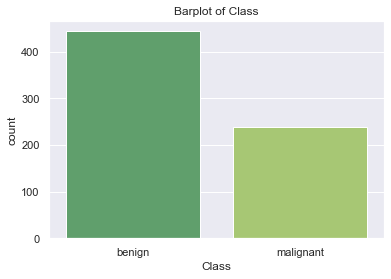

In [83]:
sns.countplot(x='Class',data=df,palette='summer')
plt.title('Barplot of Class')

In [84]:
#Cl_thickness 

C:\Users\telug\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of Cl_thickness')

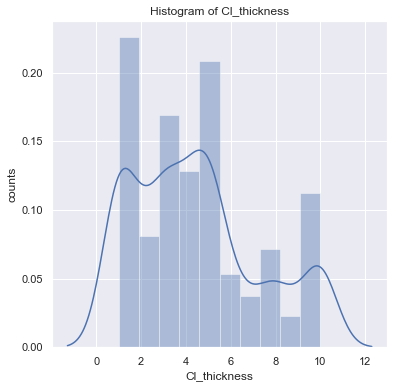

In [85]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['Cl_thickness'])
plt.show
plt.xlabel('Cl_thickness')
plt.ylabel('counts')
plt.title('Histogram of Cl_thickness') 

<AxesSubplot:>

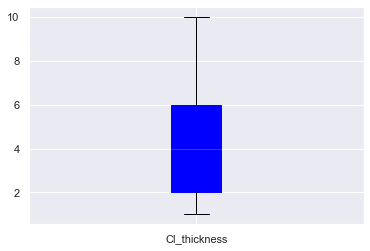

In [86]:
Cl_thickness=df['Cl_thickness']
props2= dict(boxes='blue',whiskers='black',medians='red',caps='black')
Cl_thickness.plot.box(color=props2,patch_artist=True,vert=True)

In [87]:
#Cell_size

In [88]:
df.Cell_size.value_counts() 

1     373
10     67
3      52
2      45
4      38
5      30
8      28
6      25
7      19
9       6
Name: Cell_size, dtype: int64

C:\Users\telug\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of Cell_size')

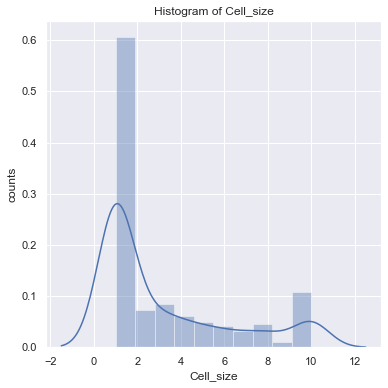

In [89]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['Cell_size'])
plt.show
plt.xlabel('Cell_size')
plt.ylabel('counts')
plt.title('Histogram of Cell_size') 

<AxesSubplot:>

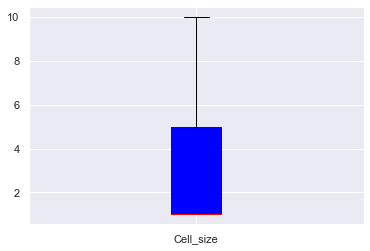

In [90]:
Cell_size=df['Cell_size']
props2= dict(boxes='blue',whiskers='black',medians='red',caps='black')
Cell_size.plot.box(color=props2,patch_artist=True,vert=True)

In [91]:
#Cell_shape

In [92]:
df.Cell_shape.value_counts() 

1     346
10     58
2      58
3      53
4      43
5      32
7      30
6      29
8      27
9       7
Name: Cell_shape, dtype: int64

C:\Users\telug\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of Cell_shape')

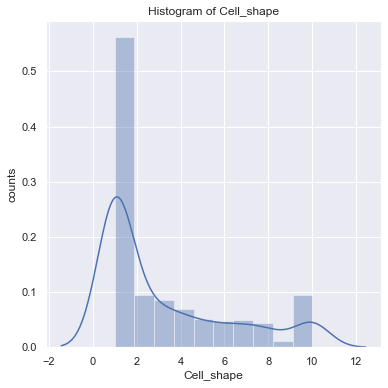

In [93]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['Cell_shape'])
plt.show
plt.xlabel('Cell_shape')
plt.ylabel('counts')
plt.title('Histogram of Cell_shape') 

<AxesSubplot:>

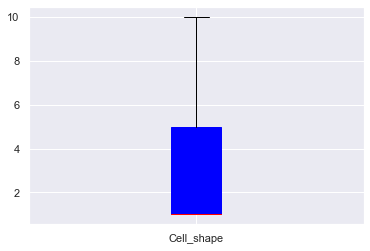

In [94]:
Cell_shape=df['Cell_shape']
props2= dict(boxes='blue',whiskers='black',medians='red',caps='black')
Cell_shape.plot.box(color=props2,patch_artist=True,vert=True)

In [95]:
#Marg_adhesion

In [96]:
df.Marg_adhesion.value_counts() 

1     393
3      58
2      58
10     55
4      33
8      25
5      23
6      21
7      13
9       4
Name: Marg_adhesion, dtype: int64

C:\Users\telug\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of Marg_adhesion')

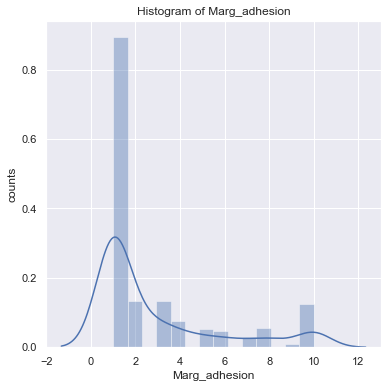

In [97]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['Marg_adhesion'])
plt.show
plt.xlabel('Marg_adhesion')
plt.ylabel('counts')
plt.title('Histogram of Marg_adhesion') 

<AxesSubplot:>

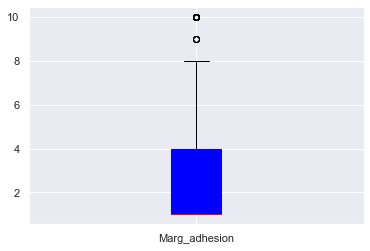

In [98]:
Marg_adhesion=df['Marg_adhesion']
props2= dict(boxes='blue',whiskers='black',medians='red',caps='black')
Marg_adhesion.plot.box(color=props2,patch_artist=True,vert=True)

In [99]:
#Epith_c_size

In [100]:
df.Epith_c_size.value_counts() 

2     376
3      71
4      48
1      44
6      40
5      39
10     31
8      21
7      11
9       2
Name: Epith_c_size, dtype: int64

C:\Users\telug\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of Epith_c_size')

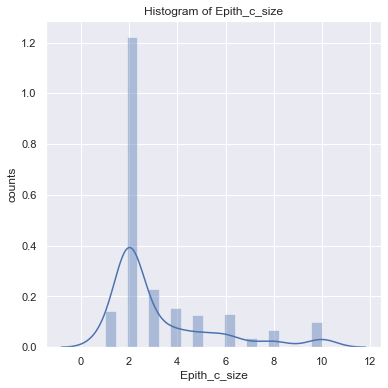

In [101]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['Epith_c_size'])
plt.show
plt.xlabel('Epith_c_size')
plt.ylabel('counts')
plt.title('Histogram of Epith_c_size') 

<AxesSubplot:>

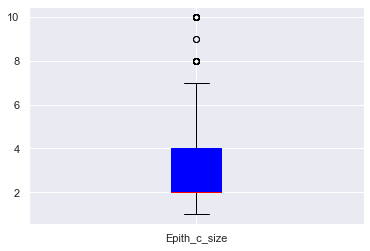

In [102]:
Epith_c_size=df['Epith_c_size']
props2= dict(boxes='blue',whiskers='black',medians='red',caps='black')
Epith_c_size.plot.box(color=props2,patch_artist=True,vert=True)

In [103]:
#Bare_nuclei

C:\Users\telug\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of Bare_nuclei')

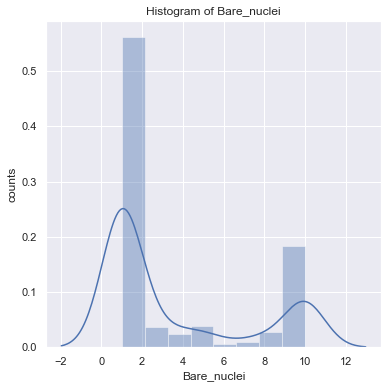

In [104]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['Bare_nuclei'])
plt.show
plt.xlabel('Bare_nuclei')
plt.ylabel('counts')
plt.title('Histogram of Bare_nuclei') 

<AxesSubplot:>

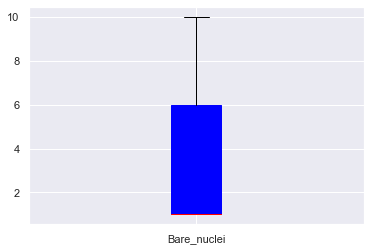

In [105]:
Bare_nuclei=df['Bare_nuclei']
props2= dict(boxes='blue',whiskers='black',medians='red',caps='black')
Bare_nuclei.plot.box(color=props2,patch_artist=True,vert=True)

In [106]:
#Bl_cromatin

In [107]:
df.Bl_cromatin.value_counts() 

3     161
2     160
1     150
7      71
4      39
5      34
8      28
10     20
9      11
6       9
Name: Bl_cromatin, dtype: int64

C:\Users\telug\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of Bl_cromatin')

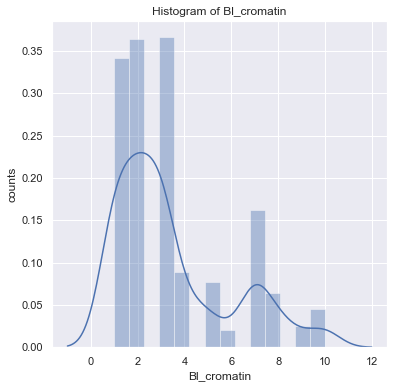

In [108]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['Bl_cromatin'])
plt.show
plt.xlabel('Bl_cromatin')
plt.ylabel('counts')
plt.title('Histogram of Bl_cromatin') 

<AxesSubplot:>

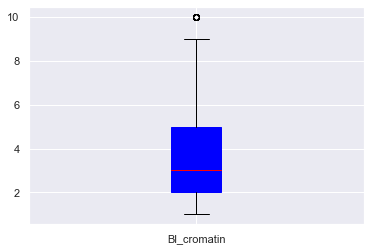

In [109]:
Bl_cromatin=df['Bl_cromatin']
props2= dict(boxes='blue',whiskers='black',medians='red',caps='black')
Bl_cromatin.plot.box(color=props2,patch_artist=True,vert=True)

In [110]:
#Normal_nucleoli

In [111]:
df.Normal_nucleoli.value_counts() 

1     432
10     60
3      42
2      36
8      23
6      22
5      19
4      18
7      16
9      15
Name: Normal_nucleoli, dtype: int64

C:\Users\telug\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of Normal_nucleoli')

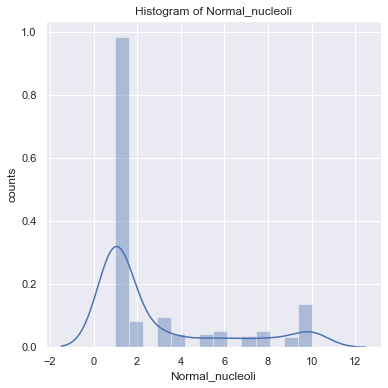

In [112]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['Normal_nucleoli'])
plt.show
plt.xlabel('Normal_nucleoli')
plt.ylabel('counts')
plt.title('Histogram of Normal_nucleoli') 

<AxesSubplot:>

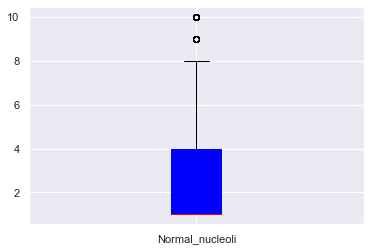

In [113]:
Normal_nucleoli=df['Normal_nucleoli']
props2= dict(boxes='blue',whiskers='black',medians='red',caps='black')
Normal_nucleoli.plot.box(color=props2,patch_artist=True,vert=True)

In [114]:
#Mitoses

In [115]:
df.Mitoses.value_counts() 

1     563
2      35
3      33
10     14
4      12
7       9
8       8
5       6
6       3
Name: Mitoses, dtype: int64

C:\Users\telug\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of Mitoses')

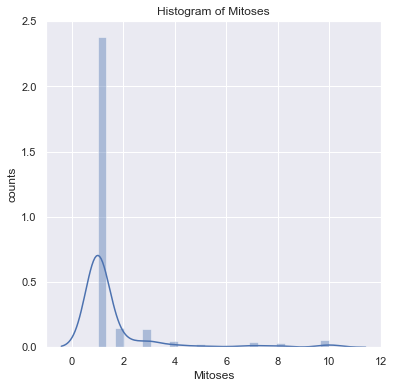

In [116]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['Mitoses'])
plt.show
plt.xlabel('Mitoses')
plt.ylabel('counts')
plt.title('Histogram of Mitoses') 

<AxesSubplot:>

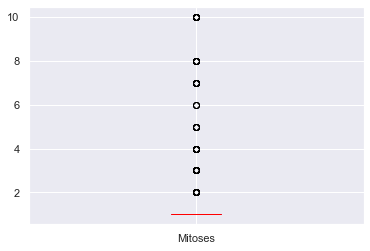

In [117]:
Mitoses=df['Mitoses']
props2= dict(boxes='blue',whiskers='black',medians='red',caps='black')
Mitoses.plot.box(color=props2,patch_artist=True,vert=True)

In [118]:
#covert to csv
#df.to_csv('BreastCancer1.csv')

In [119]:
df1= pd.read_csv("BreastCancer1.csv")

In [120]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Id               683 non-null    int64 
 1   Cl_thickness     683 non-null    int64 
 2   Cell_size        683 non-null    int64 
 3   Cell_shape       683 non-null    int64 
 4   Marg_adhesion    683 non-null    int64 
 5   Epith_c_size     683 non-null    int64 
 6   Bare_nuclei      683 non-null    int64 
 7   Bl_cromatin      683 non-null    int64 
 8   Normal_nucleoli  683 non-null    int64 
 9   Mitoses          683 non-null    int64 
 10  Class            683 non-null    object
dtypes: int64(10), object(1)
memory usage: 58.8+ KB


In [121]:
df1.drop(['Id'],axis=1,inplace=True)

In [122]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Cl_thickness     683 non-null    int64 
 1   Cell_size        683 non-null    int64 
 2   Cell_shape       683 non-null    int64 
 3   Marg_adhesion    683 non-null    int64 
 4   Epith_c_size     683 non-null    int64 
 5   Bare_nuclei      683 non-null    int64 
 6   Bl_cromatin      683 non-null    int64 
 7   Normal_nucleoli  683 non-null    int64 
 8   Mitoses          683 non-null    int64 
 9   Class            683 non-null    object
dtypes: int64(9), object(1)
memory usage: 53.5+ KB


# Model

In [123]:
df1['Class']=df1.get('Class').replace('benign',0)
df1['Class']=df1.get('Class').replace('malignant',1)

In [124]:
df1.Class.value_counts()

0    444
1    239
Name: Class, dtype: int64

#Smote

In [125]:
no_cls = df1[df1.Class == 0]
cls1 = df1[df1.Class == 1]

In [126]:
from sklearn.utils import resample
def_oversample = resample(cls1, replace = True,n_samples=len(no_cls),random_state=27)

In [127]:
BCsmote = pd.concat([no_cls, def_oversample])
BCsmote.Class.value_counts()

0    444
1    444
Name: Class, dtype: int64

In [128]:
#BCsmote.to_csv('BCsmote.csv')

In [129]:
df2= pd.read_csv("BCsmote.csv")

In [130]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 888 entries, 0 to 887
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Cl_thickness     888 non-null    int64
 1   Cell_size        888 non-null    int64
 2   Cell_shape       888 non-null    int64
 3   Marg_adhesion    888 non-null    int64
 4   Epith_c_size     888 non-null    int64
 5   Bare_nuclei      888 non-null    int64
 6   Bl_cromatin      888 non-null    int64
 7   Normal_nucleoli  888 non-null    int64
 8   Mitoses          888 non-null    int64
 9   Class            888 non-null    int64
dtypes: int64(10)
memory usage: 69.5 KB


# DECISION TREE

In [131]:
#X and y
X=df2.drop('Class',axis=1)
y=df2['Class']

In [132]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 888 entries, 0 to 887
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Cl_thickness     888 non-null    int64
 1   Cell_size        888 non-null    int64
 2   Cell_shape       888 non-null    int64
 3   Marg_adhesion    888 non-null    int64
 4   Epith_c_size     888 non-null    int64
 5   Bare_nuclei      888 non-null    int64
 6   Bl_cromatin      888 non-null    int64
 7   Normal_nucleoli  888 non-null    int64
 8   Mitoses          888 non-null    int64
dtypes: int64(9)
memory usage: 62.6 KB


In [133]:
X.shape

(888, 9)

In [134]:
y.shape

(888,)

In [135]:
#train test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=123)

In [136]:
X_train.shape

(621, 9)

In [137]:
X_test.shape

(267, 9)

In [138]:
y_train.shape

(621,)

In [139]:
y_test.shape

(267,)

In [140]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [141]:
# model 
dt = tree.DecisionTreeClassifier()
dtmodel = dt.fit(X_train, y_train)

[Text(0.2798913043478261, 0.9375, 'X[2] <= 2.5\ngini = 0.5\nsamples = 621\nvalue = [312, 309]'),
 Text(0.13043478260869565, 0.8125, 'X[5] <= 5.5\ngini = 0.035\nsamples = 284\nvalue = [279, 5]'),
 Text(0.08695652173913043, 0.6875, 'X[1] <= 7.0\ngini = 0.007\nsamples = 280\nvalue = [279, 1]'),
 Text(0.043478260869565216, 0.5625, 'gini = 0.0\nsamples = 279\nvalue = [279, 0]'),
 Text(0.13043478260869565, 0.5625, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.17391304347826086, 0.6875, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.42934782608695654, 0.8125, 'X[1] <= 1.5\ngini = 0.177\nsamples = 337\nvalue = [33, 304]'),
 Text(0.2608695652173913, 0.6875, 'X[5] <= 3.5\ngini = 0.111\nsamples = 17\nvalue = [16, 1]'),
 Text(0.21739130434782608, 0.5625, 'gini = 0.0\nsamples = 16\nvalue = [16, 0]'),
 Text(0.30434782608695654, 0.5625, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5978260869565217, 0.6875, 'X[5] <= 2.5\ngini = 0.101\nsamples = 320\nvalue = [17, 303]'),
 Text(0.39130

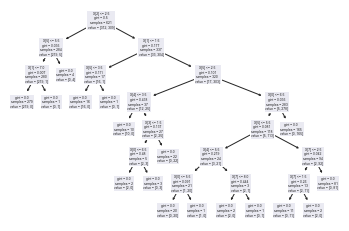

In [142]:
# tree plot
tree.plot_tree(dtmodel)

In [143]:
y_predict = dtmodel.predict(X_test)

In [144]:
# classification matrix
confusion_matrix(y_test, y_predict)

array([[125,   7],
       [  8, 127]], dtype=int64)

In [145]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       132
           1       0.95      0.94      0.94       135

    accuracy                           0.94       267
   macro avg       0.94      0.94      0.94       267
weighted avg       0.94      0.94      0.94       267



In [146]:
y_pred_prob = dtmodel.predict_proba(X_test)
fpr, tpr, thresholds =roc_curve(y_test, y_pred_prob[:,1])
roc_auc = auc(fpr, tpr) 
print(roc_auc) 

0.9438552188552188


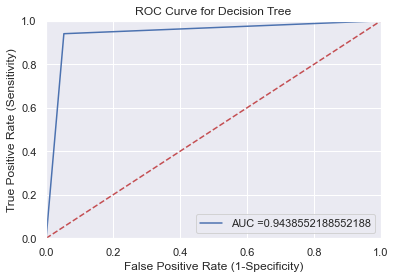

In [147]:
#ROC Curve
plt.title('ROC Curve for Decision Tree')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(fpr, tpr, label = 'AUC =' +str(roc_auc))
plt.legend(loc=4) #Location of label
plt.show()

In [148]:
#oaa
from sklearn.metrics import accuracy_score

In [149]:
y_train_pred=dt.predict(X_train)
y_test_pred=dt.predict(X_test)

In [150]:
print(round(accuracy_score(y_train,y_train_pred),2))
print(round(accuracy_score(y_test,y_test_pred),2))

1.0
0.94


In [151]:
#find optinum no of depth
depth=[1,2,3,4,5,6,7,8,9]
accuracy_train,accuracy_test=[],[]
for i in depth:
        tree=DecisionTreeClassifier(max_depth=i)
        dt.fit(X_train,y_train)
        y_train_pred1=dt.predict(X_train)
        y_test_pred1=dt.predict(X_test)
        
        accuracy_train.append(accuracy_score(y_train,y_train_pred1))
        accuracy_test.append(accuracy_score(y_test,y_test_pred1))

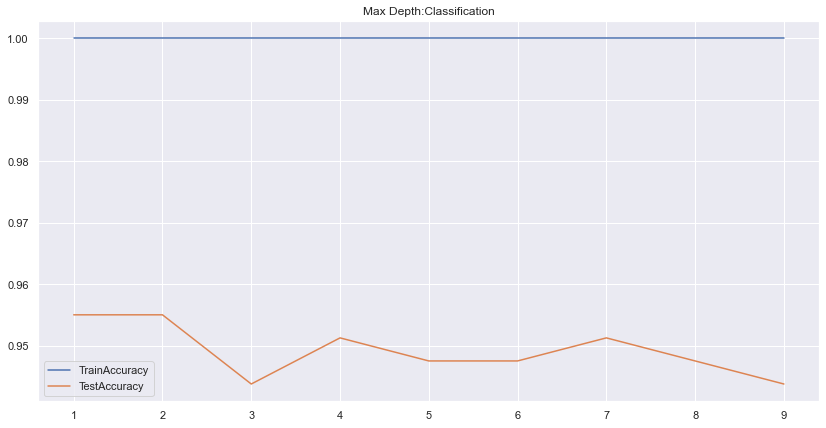

In [152]:
#plot
plt.figure(figsize=(14,7))
sns.lineplot(y=accuracy_train,x=depth,label='TrainAccuracy')
sns.lineplot(y=accuracy_test,x=depth,label='TestAccuracy')
plt.title('Max Depth:Classification')
plt.show()

In [153]:
#Building a tree with depth 4

In [154]:
tree2=DecisionTreeClassifier(random_state=40,max_depth=4)
tree2.fit(X_train,y_train)
y_train_pred2=tree2.predict(X_train)
y_test_pred2=tree2.predict(X_test)


In [155]:
print(round(accuracy_score(y_train,y_train_pred2),2))
print(round(accuracy_score(y_test,y_test_pred2),2))

0.99
0.96


# Random Forest

In [156]:
#Fit random forest

In [157]:
from sklearn.ensemble import RandomForestClassifier

In [158]:
#create the model with 100 tress
rf=RandomForestClassifier(n_estimators=100,bootstrap=True,max_features='sqrt')

In [159]:
rfFit=rf.fit(X_train,y_train)

In [160]:
#actual class prediction
y_predRF=rfFit.predict(X_test)

In [161]:
len(y_predRF)

267

In [162]:
y_predRF

array([1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0], dtype=int64)

In [163]:
#cross tab
pd.crosstab(y_test,y_predRF,margins=True,rownames=['Acctual'],colnames=['predict'])

predict,0,1,All
Acctual,,,
0,128,4,132
1,7,128,135
All,135,132,267


In [164]:
print(classification_report(y_test,y_predRF))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       132
           1       0.97      0.95      0.96       135

    accuracy                           0.96       267
   macro avg       0.96      0.96      0.96       267
weighted avg       0.96      0.96      0.96       267



In [165]:
#Probabilities for each class
predP_RF=rfFit.predict_proba(X_test)[:,1]

In [166]:
predP_RF

array([0.99, 0.98, 0.83, 0.  , 0.  , 1.  , 0.  , 0.  , 1.  , 0.  , 0.  ,
       1.  , 1.  , 0.03, 1.  , 1.  , 0.  , 0.  , 0.98, 0.88, 0.  , 0.  ,
       0.92, 0.  , 1.  , 0.92, 0.  , 0.99, 1.  , 0.98, 0.  , 0.  , 0.01,
       0.  , 0.96, 0.79, 0.  , 0.13, 1.  , 0.  , 0.99, 0.98, 0.  , 0.  ,
       0.8 , 0.2 , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.37, 0.99, 1.  ,
       0.99, 1.  , 0.  , 0.04, 0.97, 1.  , 0.99, 0.85, 0.  , 0.  , 0.99,
       0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.98, 0.02, 1.  , 1.  ,
       1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.97, 0.97, 0.  , 0.  , 0.  ,
       1.  , 0.04, 0.  , 0.02, 1.  , 0.  , 0.  , 0.99, 0.  , 1.  , 0.  ,
       0.  , 1.  , 0.  , 1.  , 0.  , 1.  , 1.  , 0.14, 0.18, 0.  , 0.  ,
       0.  , 0.  , 0.  , 1.  , 0.  , 1.  , 0.  , 0.92, 0.  , 0.91, 0.  ,
       1.  , 0.42, 0.96, 1.  , 0.  , 1.  , 0.98, 0.  , 1.  , 0.  , 0.  ,
       1.  , 0.48, 0.99, 0.  , 0.99, 0.96, 0.  , 0.94, 0.99, 0.  , 0.  ,
       0.42, 1.  , 0.  , 0.  , 0.  , 0.97, 0.99, 0.

In [167]:
#ROC Curve
#find fpr,tpr,threshold
false_positive_rateRF,true_positive_rateRF,thresholdsRF=sklearn.metrics.roc_curve(y_test,predP_RF)

In [168]:
roc_aucRF=auc(false_positive_rateRF,true_positive_rateRF)

In [169]:
roc_aucRF

0.9828563411896745

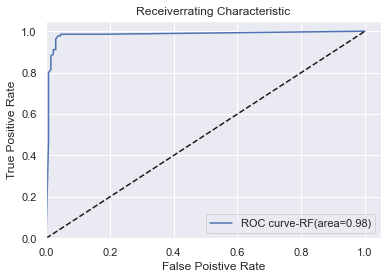

In [170]:
#plot
%matplotlib inline
plt.figure()
plt.plot(false_positive_rateRF,true_positive_rateRF,label='ROC curve-RF(area=%0.2f)'%roc_aucRF)
plt.plot([0,1],[0,1],'k--')#k for black,r for red,b for blue,g for green
plt.xlim([0.0,1.05])
plt.ylim([0.0,1.05])
plt.xlabel('False Poistive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiverrating Characteristic')
plt.legend(loc='lower right')
plt.show()

Importance of variable

In [171]:
#extracr feature importances
fi=pd.DataFrame({'feature':list(X_train.columns),'importance':rfFit.feature_importances_}).\
sort_values('importance',ascending=False)

In [172]:
fi.head()

,feature,importance
2,Cell_shape,0.290012
1,Cell_size,0.229423
5,Bare_nuclei,0.181861
4,Epith_c_size,0.088015
6,Bl_cromatin,0.082523


# Grid search model



In [173]:
from sklearn.model_selection import GridSearchCV

In [174]:
param_grid={'bootstrap':[True],'max_depth':[5,6,7,8,9,10,11],'max_features':['auto','log2'],'n_estimators':[25,50,100,150,200]}

In [175]:
rfr=RandomForestClassifier(random_state=1)

In [176]:
g_search=GridSearchCV(estimator=rfr,param_grid=param_grid,cv=3)

In [177]:
gmod=g_search.fit(X_train,y_train)

In [178]:
#best parameters
print(gmod.best_params_)

{'bootstrap': True, 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 150}


In [179]:
gprd=gmod.predict(X_test)

In [180]:
gprd

array([1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0], dtype=int64)

In [181]:
pd.crosstab(y_test,gprd,margins=True,rownames=['Acctual'],colnames=['predict'])

predict,0,1,All
Acctual,,,
0,128,4,132
1,5,130,135
All,133,134,267


In [182]:
print(classification_report(y_test,gprd))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       132
           1       0.97      0.96      0.97       135

    accuracy                           0.97       267
   macro avg       0.97      0.97      0.97       267
weighted avg       0.97      0.97      0.97       267



In [205]:
#Probabilities for each class
predP_RFG=gmod.predict_proba(X_test)[:,1]

In [206]:
predP_RFG

array([9.67764131e-01, 9.81443760e-01, 7.88481161e-01, 1.13524767e-04,
       1.91044147e-04, 9.97725478e-01, 1.54636059e-03, 2.13027254e-04,
       9.93644691e-01, 1.91044147e-04, 1.43112912e-03, 9.98615954e-01,
       9.99407567e-01, 7.02721945e-02, 9.69878810e-01, 9.95046617e-01,
       1.13524767e-04, 1.13524767e-04, 9.81803340e-01, 8.01664514e-01,
       2.90546634e-04, 1.13524767e-04, 9.16114077e-01, 1.13524767e-04,
       9.97267535e-01, 9.19166355e-01, 6.75782007e-03, 9.94723240e-01,
       9.67872693e-01, 9.88333401e-01, 1.13524767e-04, 1.13524767e-04,
       2.56085521e-03, 1.91044147e-04, 9.57336960e-01, 7.80204108e-01,
       1.13524767e-04, 1.92032613e-01, 9.98882888e-01, 1.13524767e-04,
       9.88250342e-01, 9.67098626e-01, 1.13524767e-04, 1.13524767e-04,
       7.38887924e-01, 3.11552012e-01, 9.96353139e-01, 1.13524767e-04,
       2.13027254e-04, 3.25127689e-02, 1.13524767e-04, 1.91044147e-04,
       4.65453529e-01, 9.67764131e-01, 9.97826012e-01, 9.29781551e-01,
      

In [207]:
#ROC Curve
#find fpr,tpr,threshold
false_positive_rateRFG,true_positive_rateRFG,thresholdsRFG=sklearn.metrics.roc_curve(y_test,predP_RFG)

In [208]:
roc_aucRFG=auc(false_positive_rateRFG,true_positive_rateRFG)

In [209]:
roc_aucRFG

0.9882716049382716

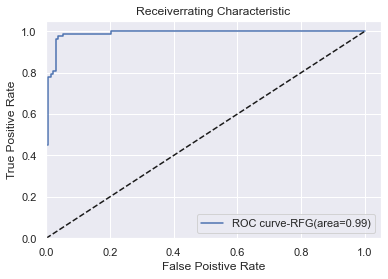

In [210]:
#plot
%matplotlib inline
plt.figure()
plt.plot(false_positive_rateRFG,true_positive_rateRFG,label='ROC curve-RFG(area=%0.2f)'%roc_aucRFG)
plt.plot([0,1],[0,1],'k--')#k for black,r for red,b for blue,g for green
plt.xlim([0.0,1.05])
plt.ylim([0.0,1.05])
plt.xlabel('False Poistive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiverrating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Adaptive Boosting

In [148]:
from sklearn.ensemble import AdaBoostClassifier

In [149]:
ada=AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=200)

In [150]:
adaFit=ada.fit(X_train,y_train)

In [151]:
adaFit

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=200)

In [152]:
y_predADA=ada.predict(X_test)

In [153]:
y_predADA

array([1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0], dtype=int64)

In [154]:
#crosstab
pd.crosstab(y_test,y_predADA,margins=True,rownames=['Actual'],colnames=['Predict'])

Predict,0,1,All
Actual,,,
0,128,4,132
1,5,130,135
All,133,134,267


In [155]:
print(classification_report(y_test,y_predADA))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       132
           1       0.97      0.96      0.97       135

    accuracy                           0.97       267
   macro avg       0.97      0.97      0.97       267
weighted avg       0.97      0.97      0.97       267



In [156]:
#probabilities
predP_ADA=adaFit.predict_proba(X_test)[:,1]

In [157]:
predP_ADA

array([0.52674113, 0.60973583, 0.6521816 , 0.39291081, 0.39955865,
       0.71878901, 0.39962656, 0.40032326, 0.71718851, 0.39955865,
       0.46654854, 0.67833695, 0.76595094, 0.40804952, 0.66718504,
       0.59797835, 0.39955865, 0.39955865, 0.62873185, 0.61720696,
       0.39864895, 0.39955865, 0.52915494, 0.39388356, 0.704258  ,
       0.57970525, 0.40251844, 0.69461646, 0.53793884, 0.63048797,
       0.4018072 , 0.39955865, 0.39047758, 0.39955865, 0.61482182,
       0.56030968, 0.39955865, 0.47947599, 0.68887774, 0.39955865,
       0.61707866, 0.66318576, 0.39436003, 0.39955865, 0.52210207,
       0.46446702, 0.62818107, 0.39955865, 0.39864895, 0.39643668,
       0.39955865, 0.39388356, 0.45343429, 0.52674113, 0.74284942,
       0.53272211, 0.79685515, 0.40032326, 0.4282086 , 0.6522799 ,
       0.58191061, 0.68162947, 0.55057025, 0.39291081, 0.39955865,
       0.64758078, 0.39291081, 0.39962656, 0.40032326, 0.39955865,
       0.39955865, 0.68714626, 0.40032326, 0.67422853, 0.40298

In [158]:
#ROC Curve
false_positive_rateADA,true_positive_rateADA,thresholdsADA=sklearn.metrics.roc_curve(y_test,predP_ADA)

In [159]:
roc_aucADA=auc(false_positive_rateADA,true_positive_rateADA)

In [160]:
roc_aucADA

0.9881593714927048

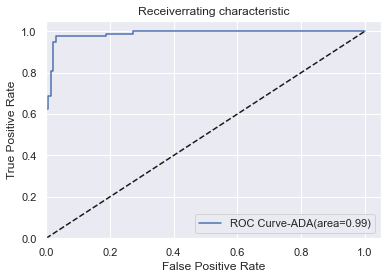

In [161]:
#Plot
%matplotlib inline
plt.figure()
plt.plot(false_positive_rateADA,true_positive_rateADA,label='ROC Curve-ADA(area=%0.2f)'%roc_aucADA)
plt.plot([0,1],[0,1],'k--')#k for black,r for red,b for blue,g for green
plt.xlim([0.0,1.05])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiverrating characteristic')
plt.legend(loc='lower right')
plt.show()

# Random search model

In [195]:
from sklearn.model_selection import RandomizedSearchCV

In [196]:
rfr_random=RandomizedSearchCV(estimator=rfr,param_distributions=param_grid,n_iter=20,cv=3,random_state=421)

In [198]:
rmod=rfr_random.fit(X_train,y_train)

In [199]:
#best parameters
print(rmod.best_params_)

{'n_estimators': 150, 'max_features': 'log2', 'max_depth': 5, 'bootstrap': True}


In [201]:
rprd=rmod.predict(X_test)

In [202]:
rprd

array([1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0], dtype=int64)

In [203]:
#crosstab
pd.crosstab(y_test,rprd,margins=True,rownames=['Actual'],colnames=['Predict'])

Predict,0,1,All
Actual,,,
0,128,4,132
1,5,130,135
All,133,134,267


In [204]:
print(classification_report(y_test,rprd))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       132
           1       0.97      0.96      0.97       135

    accuracy                           0.97       267
   macro avg       0.97      0.97      0.97       267
weighted avg       0.97      0.97      0.97       267



In [211]:
#probabilities
predP_RANDOM=rmod.predict_proba(X_test)[:,1]

In [212]:
predP_RANDOM

array([9.67764131e-01, 9.81443760e-01, 7.88481161e-01, 1.13524767e-04,
       1.91044147e-04, 9.97725478e-01, 1.54636059e-03, 2.13027254e-04,
       9.93644691e-01, 1.91044147e-04, 1.43112912e-03, 9.98615954e-01,
       9.99407567e-01, 7.02721945e-02, 9.69878810e-01, 9.95046617e-01,
       1.13524767e-04, 1.13524767e-04, 9.81803340e-01, 8.01664514e-01,
       2.90546634e-04, 1.13524767e-04, 9.16114077e-01, 1.13524767e-04,
       9.97267535e-01, 9.19166355e-01, 6.75782007e-03, 9.94723240e-01,
       9.67872693e-01, 9.88333401e-01, 1.13524767e-04, 1.13524767e-04,
       2.56085521e-03, 1.91044147e-04, 9.57336960e-01, 7.80204108e-01,
       1.13524767e-04, 1.92032613e-01, 9.98882888e-01, 1.13524767e-04,
       9.88250342e-01, 9.67098626e-01, 1.13524767e-04, 1.13524767e-04,
       7.38887924e-01, 3.11552012e-01, 9.96353139e-01, 1.13524767e-04,
       2.13027254e-04, 3.25127689e-02, 1.13524767e-04, 1.91044147e-04,
       4.65453529e-01, 9.67764131e-01, 9.97826012e-01, 9.29781551e-01,
      

In [213]:
#ROC Curve
false_positive_rateRANDOM,true_positive_rateRANDOM,thresholdsRANDOM=sklearn.metrics.roc_curve(y_test,predP_RANDOM)

In [214]:
roc_aucRANDOM=auc(false_positive_rateRANDOM,true_positive_rateRANDOM)

In [215]:
roc_aucRANDOM

0.9882716049382716

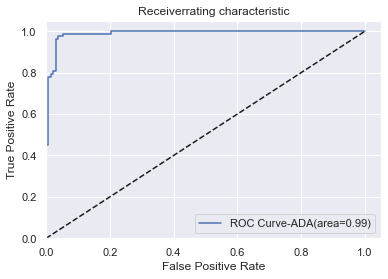

In [216]:
#Plot
%matplotlib inline
plt.figure()
plt.plot(false_positive_rateRANDOM,true_positive_rateRANDOM,label='ROC Curve-ADA(area=%0.2f)'%roc_aucRANDOM)
plt.plot([0,1],[0,1],'k--')#k for black,r for red,b for blue,g for green
plt.xlim([0.0,1.05])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiverrating characteristic')
plt.legend(loc='lower right')
plt.show()

# GRADIENT BOOSTING

In [219]:
from sklearn.model_selection import GridSearchCV

In [221]:
from sklearn.ensemble import GradientBoostingClassifier




In [222]:
Model=GradientBoostingClassifier()
params={'n_estimators':range(1,200)}
grid=GridSearchCV(estimator=Model,cv=2,param_grid=params,scoring='f1')
grid.fit(X,y)
print('the best estimator returned by GridSearchCV is:',grid.best_estimator_)

the best estimator returned by GridSearchCV is: GradientBoostingClassifier(n_estimators=146)


In [223]:
#Best Model
GB=grid.best_estimator_
GB.fit(X,y)

GradientBoostingClassifier(n_estimators=146)

In [227]:
y_predictGB=GB.predict(X_test)

In [228]:
y_predictGB

array([1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1], dtype=int64)

In [229]:
#crosstab
pd.crosstab(y_test,y_predictGB,margins=True,rownames=['Actual'],colnames=['Predict'])

Predict,0,1,All
Actual,,,
0,132,0,132
1,0,135,135
All,132,135,267


In [230]:
print(classification_report(y_test,y_predictGB))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       135

    accuracy                           1.00       267
   macro avg       1.00      1.00      1.00       267
weighted avg       1.00      1.00      1.00       267



In [232]:
#probabilities
predP_GB=GB.predict_proba(X_test)[:,1]

In [233]:
predP_GB

array([9.93684003e-01, 9.99345993e-01, 9.99153113e-01, 3.42570354e-04,
       3.42570354e-04, 9.99936140e-01, 3.62082103e-04, 3.42570354e-04,
       9.99879079e-01, 3.42570354e-04, 5.25398202e-04, 9.99948740e-01,
       9.99967491e-01, 7.34003944e-04, 9.97920605e-01, 9.99847607e-01,
       3.42570354e-04, 2.67348585e-04, 9.99230409e-01, 9.93931988e-01,
       8.48427718e-04, 3.46249270e-04, 9.79079825e-01, 4.72857529e-04,
       9.99958071e-01, 9.97746809e-01, 9.47457095e-01, 9.99971735e-01,
       9.96375897e-01, 9.98010996e-01, 3.98086794e-04, 2.67348585e-04,
       2.37532946e-04, 3.42570354e-04, 1.84657487e-01, 9.80098922e-01,
       3.42570354e-04, 6.87138285e-04, 9.99905437e-01, 2.67348585e-04,
       9.99452437e-01, 9.99345723e-01, 3.10653050e-04, 2.67348585e-04,
       9.57174347e-01, 1.81101274e-02, 9.99750655e-01, 3.42570354e-04,
       2.48493233e-04, 4.99366874e-04, 3.42570354e-04, 6.05866691e-04,
       5.76661899e-02, 9.93684003e-01, 9.99717747e-01, 9.97409854e-01,
      

In [234]:
#ROC Curve
false_positive_rateGB,true_positive_rateGB,thresholdsGB=sklearn.metrics.roc_curve(y_test,predP_GB)

In [235]:
roc_aucGB=auc(false_positive_rateGB,true_positive_rateGB)

In [236]:
roc_aucGB

1.0

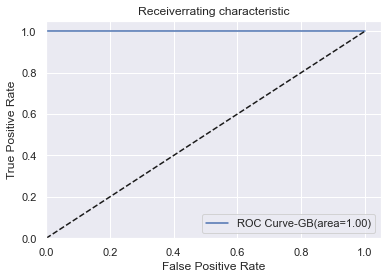

In [237]:
#Plot
%matplotlib inline
plt.figure()
plt.plot(false_positive_rateGB,true_positive_rateGB,label='ROC Curve-GB(area=%0.2f)'%roc_aucGB)
plt.plot([0,1],[0,1],'k--')#k for black,r for red,b for blue,g for green
plt.xlim([0.0,1.05])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiverrating characteristic')
plt.legend(loc='lower right')
plt.show()